In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
import time
from Doublet_Functions import calcDoubletFraction, getInstrinsicViscosity, getStress

## Three variables vs time plot

Total time elapsed =  0.26259398460388184


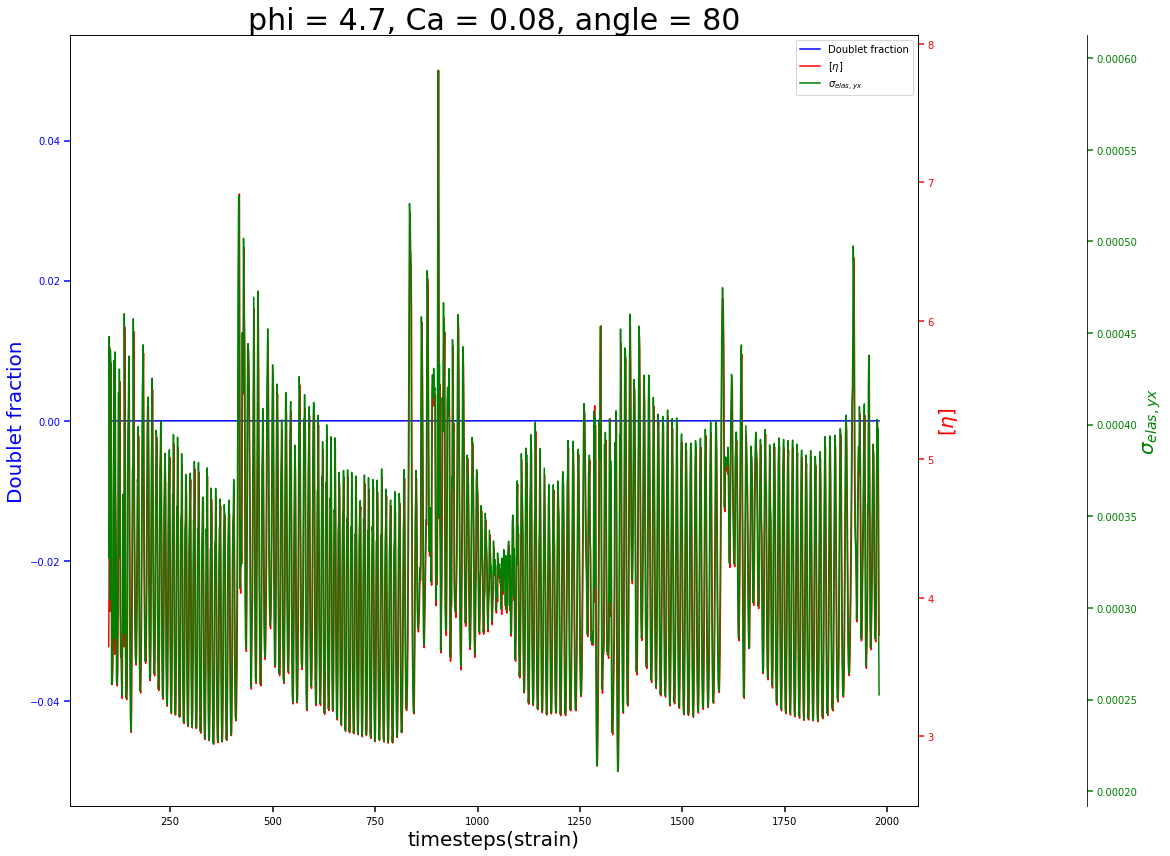

In [21]:
start_time = time.time()

ncycle = 2000
phi, Ca, angle = 4.7, 0.08, 80

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots(figsize = (16, 12))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
    
df = calcDoubletFraction(phi, Ca, 1.0, 1.0, 0, angle)[0]
simul_time = list(range(len(df)))
p1, = host.plot(simul_time[100:], df[100:], "b-", label = "Doublet fraction")
p2, = par1.plot(simul_time[100:], getInstrinsicViscosity(phi, Ca, 0, ncycle, angle)[100:len(df)], "r-", label = r'$\left[ \eta \right]$')
p3, = par2.plot(simul_time[100:], getStress(phi, Ca, 0, 0, ncycle, angle)[:,3][100:len(df)], "g-", label = r'$\sigma _{elas, yx}$')

host.set_title('phi = {}, Ca = {}, angle = {}'.format(phi, Ca, angle), fontsize = 30)
host.set_xlabel("timesteps(strain)", fontsize = 20)
host.set_ylabel("Doublet fraction", fontsize = 20)
par1.set_ylabel(r'$\left[ \eta \right]$', fontsize = 20)
par2.set_ylabel(r'$\sigma _{elas, yx}$', fontsize = 20)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=6, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines])
fig.tight_layout()
#plt.savefig('./Pictures/TwoCellSystem_ThreeVariables_phi_{}.png'.format(phi), dpi = 300)
print('Total time elapsed = ', time.time()-start_time)

## Correlation function